In [1]:
import pandas as pd
from sklearn import preprocessing

In [35]:
df = pd.read_csv('./data/data_processed.csv')

In [36]:
df.columns

Index(['adresDzialanosci_gmina', 'adresDzialanosci_miasto', '2712Z', '2790Z',
       '2841Z', '2899Z', '3312Z', '3320Z', '4321Z', 'pkd_total',
       'data_rozpoczecia', 'status'],
      dtype='object')

In [37]:
df.sample()

,adresDzialanosci_gmina,adresDzialanosci_miasto,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,data_rozpoczecia,status
12292,Wielka Wieś,Modlnica,0,0,0,0,1,0,0,23,2008-10-01,AKTYWNY


In [38]:
df['data_rozpoczecia'] = pd.to_datetime(df['data_rozpoczecia'])
df['data_rozpoczecia_rok'] = df['data_rozpoczecia'].dt.year
df['data_rozpoczecia_miesiac'] = df['data_rozpoczecia'].dt.month
df = df.drop(['data_rozpoczecia'], axis=1)

In [39]:
le_status = preprocessing.LabelEncoder()
df['status'] = le_status.fit_transform(df['status'])

In [40]:
list(le_status.classes_)

['AKTYWNY', 'WYKRESLONY', 'ZAWIESZONY']

In [41]:
le_gminy = preprocessing.LabelEncoder()
le_miasta = preprocessing.LabelEncoder()
df['adres_gmina'] = le_gminy.fit_transform(df['adresDzialanosci_gmina'])
df['adres_miasto'] = le_miasta.fit_transform(df['adresDzialanosci_miasto'])
df = df.drop(['adresDzialanosci_gmina', 'adresDzialanosci_miasto'], axis=1)

In [42]:
df.sample(3)

,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,status,data_rozpoczecia_rok,data_rozpoczecia_miesiac,adres_gmina,adres_miasto
48757,0,0,0,0,0,0,1,55,1,2011,5,99,840
59818,0,0,0,0,1,0,0,10,0,2018,6,103,840
31275,0,0,0,0,0,0,1,18,0,2013,2,112,2384


# LEARNING

In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop(['status'], axis=1)
y = df['status']

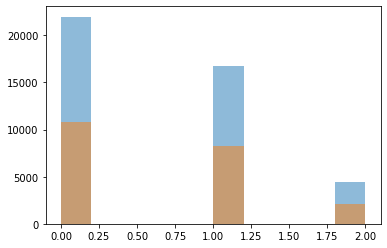

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()